# Pythonの基礎と簡単な分析

## 内容

- Pythonの基礎の確認
- Pythonを使った簡単なデータ分析

## ディレクトリ構成

```
20240831_データ分析研修
├─input
├─output
│  └─df3.xlsx
└─src
    └─xxxx.ipynb
```

---

## 参考URL

### Pythonの基本

1. 次のページを読み進めながら、実際のPythonの使い方を学びましょう。
   - [ゼロからのPython入門講座](https://www.python.jp/train/index.html)

- ※必要な項目のみ読めば大丈夫です

### その他

- [[東京大学]Pythonプログラミング入門](https://utokyo-ipp.github.io/)
  - 東大のPython教材
- [Python早見帳](https://chokkan.github.io/python/index.html)
  - Python早見帳は、Pythonのプログラムと実行例をさっと確認（早見）できるJupyter Notebook（帳）です。

# Load modules

In [1]:
!pip install japanize_matplotlib

In [2]:
import sys, os
import gc
import numpy as np
import pandas as pd

# 可視化用関数
import matplotlib.pyplot as plt
import seaborn as sns

import japanize_matplotlib

%matplotlib inline

# Setting

## warning

In [3]:
import warnings
warnings.simplefilter('ignore')

## Google Colab用設定

In [4]:
# 各自書き換えてください
current_project_dpath = '/content/drive/MyDrive/work/matsue_ct/20240831_データ分析研修'
print(current_project_dpath)

/content/drive/MyDrive/work/matsue_ct/20240831_データ分析研修


In [5]:
from google.colab import drive

drive.mount('/content/drive')
os.chdir(current_project_dpath)

# 現在のディレクトリを確認
print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/work/matsue_ct/20240831_データ分析研修


# Python基礎

## 数値

In [6]:
a = 1 + 2
a

3

In [7]:
type(a)

int

In [8]:
b = 1.5 + 2
b

3.5

In [9]:
type(b)

float

## 文字列

In [10]:
s = 'てすと' + 'します'
s

'てすとします'

In [11]:
type(s)

str

In [12]:
# *を使ってたくさん文字列を繋げることも可能
t = 'あいうえお' * 3
t

'あいうえおあいうえおあいうえお'

## list型

In [13]:
l = [1, 2, 3]
l

[1, 2, 3]

In [14]:
type(l)

list

In [15]:
for ii in l:
    print(ii)

1
2
3


## 辞書型

In [16]:
d = {
    'あ': 5,
    'い': 6,
    'う': 7
}

In [17]:
d['い']

6

In [18]:
type(d)

dict

In [19]:
for ii in d:
    print(ii)

あ
い
う


## 関数

### 普通の関数

In [20]:
def func0(x):
    """
    x: 引数という
    ret: 戻り値という
    """
    ret = 2 * x + 1
    return ret

In [21]:
func0(5)

11

### lambda関数

In [22]:
# xを渡すと2x+1を返す関数
f = (lambda x: 2 * x + 1)
f

<function __main__.<lambda>(x)>

In [23]:
f(5)

11

# DataFrame作成

row: 行.  
column: 列.カラム名=列名.

## 作り方1

pd.DataFrame(リスト, columns=リスト)

In [24]:
df0 = pd.DataFrame(
    [
        ['太郎', 160, 55, 20],
        ['次郎', 170,60,26],
        ['三郎', 180, 70, 30],
        ['四郎', 150, 50, 10],
        ['花子', 145, 45, 13]
    ],
    columns=['名前', '身長', '体重', '年齢']
)
df0

,名前,身長,体重,年齢
0,太郎,160,55,20
1,次郎,170,60,26
2,三郎,180,70,30
3,四郎,150,50,10
4,花子,145,45,13


## 作り方2

pd.DataFrame(辞書)

In [25]:
df1 = pd.DataFrame(
    {
        '名前': ['太郎', '次郎', '三郎', '四郎', '花子'],
        '身長': [160, 170, 180, 150, 145],
        '体重': [50, 60, 70, 50, 45],
        '年齢': [20, 26, 30, 10, 13]
    }
)
df1

,名前,身長,体重,年齢
0,太郎,160,50,20
1,次郎,170,60,26
2,三郎,180,70,30
3,四郎,150,50,10
4,花子,145,45,13


## 比較してみる

In [26]:
df0 == df1

,名前,身長,体重,年齢
0,True,True,False,True
1,True,True,True,True
2,True,True,True,True
3,True,True,True,True
4,True,True,True,True


# 前処理・分析の基礎

## 列の指定

In [27]:
df0[['名前', '年齢']]

,名前,年齢
0,太郎,20
1,次郎,26
2,三郎,30
3,四郎,10
4,花子,13


## 行の追加

In [28]:
df0.loc[5] = ['五郎', 200, 90, 22]
df0

,名前,身長,体重,年齢
0,太郎,160,55,20
1,次郎,170,60,26
2,三郎,180,70,30
3,四郎,150,50,10
4,花子,145,45,13
5,五郎,200,90,22


In [29]:
df0.shape

(6, 4)

## 列の追加

### 全ての行で値が同じ場合

In [30]:
df0['出身地'] = '島根'
df0

,名前,身長,体重,年齢,出身地
0,太郎,160,55,20,島根
1,次郎,170,60,26,島根
2,三郎,180,70,30,島根
3,四郎,150,50,10,島根
4,花子,145,45,13,島根
5,五郎,200,90,22,島根


In [31]:
df0.shape

(6, 5)

### 行ごとに値が違う場合

In [32]:
df0['現住所'] = ['島根', '大阪', '東京', '島根', '東京', '広島']
df0['性別'] = ['男', '男', '男', '男', '女', '男']
df0

,名前,身長,体重,年齢,出身地,現住所,性別
0,太郎,160,55,20,島根,島根,男
1,次郎,170,60,26,島根,大阪,男
2,三郎,180,70,30,島根,東京,男
3,四郎,150,50,10,島根,島根,男
4,花子,145,45,13,島根,東京,女
5,五郎,200,90,22,島根,広島,男


In [33]:
df0.shape

(6, 7)

### 条件を満たす行のみを抽出

In [34]:
df2 = df0[df0['現住所']=='島根']
df2

,名前,身長,体重,年齢,出身地,現住所,性別
0,太郎,160,55,20,島根,島根,男
3,四郎,150,50,10,島根,島根,男


In [35]:
df2.shape

(2, 7)

## 2つの列から計算して新たな列を追加

In [36]:
df0

,名前,身長,体重,年齢,出身地,現住所,性別
0,太郎,160,55,20,島根,島根,男
1,次郎,170,60,26,島根,大阪,男
2,三郎,180,70,30,島根,東京,男
3,四郎,150,50,10,島根,島根,男
4,花子,145,45,13,島根,東京,女
5,五郎,200,90,22,島根,広島,男


BMIを追加してみることにする

\begin{align}
\mathrm{BMI} = \dfrac{w}{h^2}
\end{align}

In [37]:
df3 = df0.copy()
df4 = df0.copy()

### BMIを計算する関数を定義してapply()を使用する

In [38]:
def calc_bmi(row):
    """
    BMIを計算して返す
    """
    # print(row)
    w = row['体重']
    h = row['身長'] / 100
    bmi = w / h**2
    return bmi

In [39]:
df3['BMI'] = df3.apply(calc_bmi, axis=1)
df3

,名前,身長,体重,年齢,出身地,現住所,性別,BMI
0,太郎,160,55,20,島根,島根,男,21.484375
1,次郎,170,60,26,島根,大阪,男,20.761246
2,三郎,180,70,30,島根,東京,男,21.604938
3,四郎,150,50,10,島根,島根,男,22.222222
4,花子,145,45,13,島根,東京,女,21.403092
5,五郎,200,90,22,島根,広島,男,22.500000


### BMIを計算するlambda関数を定義してapply()を使用する

In [40]:
df4['BMI'] = df4.apply(lambda row: row['体重'] / ((row['身長']/100)**2), axis=1)
df4

,名前,身長,体重,年齢,出身地,現住所,性別,BMI
0,太郎,160,55,20,島根,島根,男,21.484375
1,次郎,170,60,26,島根,大阪,男,20.761246
2,三郎,180,70,30,島根,東京,男,21.604938
3,四郎,150,50,10,島根,島根,男,22.222222
4,花子,145,45,13,島根,東京,女,21.403092
5,五郎,200,90,22,島根,広島,男,22.500000


In [41]:
# 同じ結果になる
df3 == df4

,名前,身長,体重,年齢,出身地,現住所,性別,BMI
0,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True,True


## 基本統計量を確認

In [42]:
df3.describe()

,身長,体重,年齢,BMI
count,6.000000,6.000000,6.000000,6.000000
mean,167.500000,61.666667,20.166667,21.662645
std,20.432817,16.329932,7.600439,0.621175
min,145.000000,45.000000,10.000000,20.761246
25%,152.500000,51.250000,14.750000,21.423412
50%,165.000000,57.500000,21.000000,21.544657
75%,177.500000,67.500000,25.000000,22.067901
max,200.000000,90.000000,30.000000,22.500000


## mean()など単体でも関数としてあるので使える

In [43]:
df3

,名前,身長,体重,年齢,出身地,現住所,性別,BMI
0,太郎,160,55,20,島根,島根,男,21.484375
1,次郎,170,60,26,島根,大阪,男,20.761246
2,三郎,180,70,30,島根,東京,男,21.604938
3,四郎,150,50,10,島根,島根,男,22.222222
4,花子,145,45,13,島根,東京,女,21.403092
5,五郎,200,90,22,島根,広島,男,22.500000


In [44]:
# 平均
df3[[
    '身長',
    '体重',
    '年齢',
    'BMI'
]].mean()

,0
身長,167.500000
体重,61.666667
年齢,20.166667
BMI,21.662645


In [45]:
# 最大値
df3.max()

,0
名前,花子
身長,200
体重,90
年齢,30
出身地,島根
現住所,東京
性別,男
BMI,22.5


In [46]:
df0

,名前,身長,体重,年齢,出身地,現住所,性別
0,太郎,160,55,20,島根,島根,男
1,次郎,170,60,26,島根,大阪,男
2,三郎,180,70,30,島根,東京,男
3,四郎,150,50,10,島根,島根,男
4,花子,145,45,13,島根,東京,女
5,五郎,200,90,22,島根,広島,男


In [47]:
df3

,名前,身長,体重,年齢,出身地,現住所,性別,BMI
0,太郎,160,55,20,島根,島根,男,21.484375
1,次郎,170,60,26,島根,大阪,男,20.761246
2,三郎,180,70,30,島根,東京,男,21.604938
3,四郎,150,50,10,島根,島根,男,22.222222
4,花子,145,45,13,島根,東京,女,21.403092
5,五郎,200,90,22,島根,広島,男,22.500000


In [48]:
gc.collect()

66

## 相関を確認

### 相関行列のDataFrame

In [49]:
corr = df3[[
    '身長',
    '体重',
    '年齢',
    'BMI'
]].corr()
corr

,身長,体重,年齢,BMI
身長,1.000000,0.989011,0.692216,0.340734
体重,0.989011,1.000000,0.585480,0.467923
年齢,0.692216,0.585480,1.000000,-0.342695
BMI,0.340734,0.467923,-0.342695,1.000000


### 相関行列をヒートマップで可視化

<Axes: >

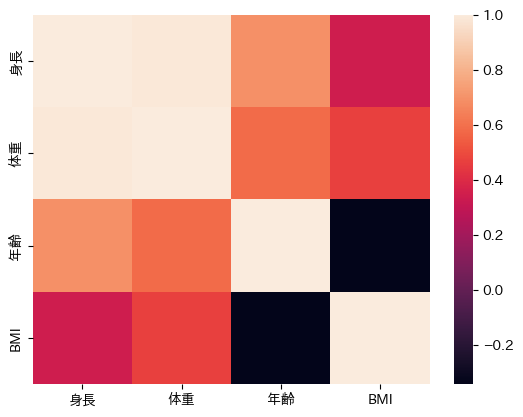

In [50]:
sns.heatmap(corr)

## 散布図

### scatterを使用

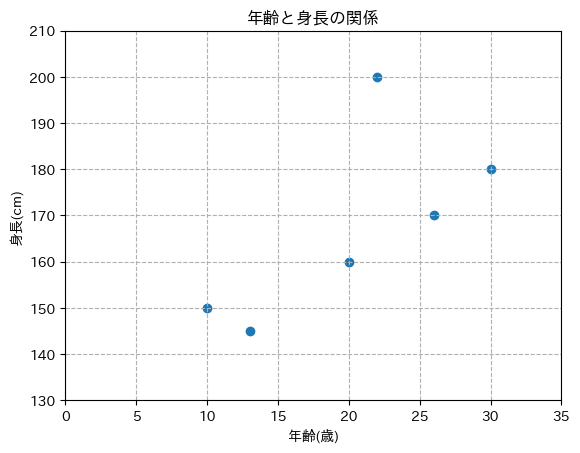

In [51]:
plt.scatter(
    df3['年齢'],
    df3['身長']
)

# 表示範囲
plt.xlim([0, 35])
plt.ylim([130, 210])

# 軸名、タイトル名
plt.xlabel('年齢(歳)')
plt.ylabel('身長(cm)')
plt.title('年齢と身長の関係', fontsize=12)

# grid
plt.grid(ls='--')
plt.show()

### pairplot

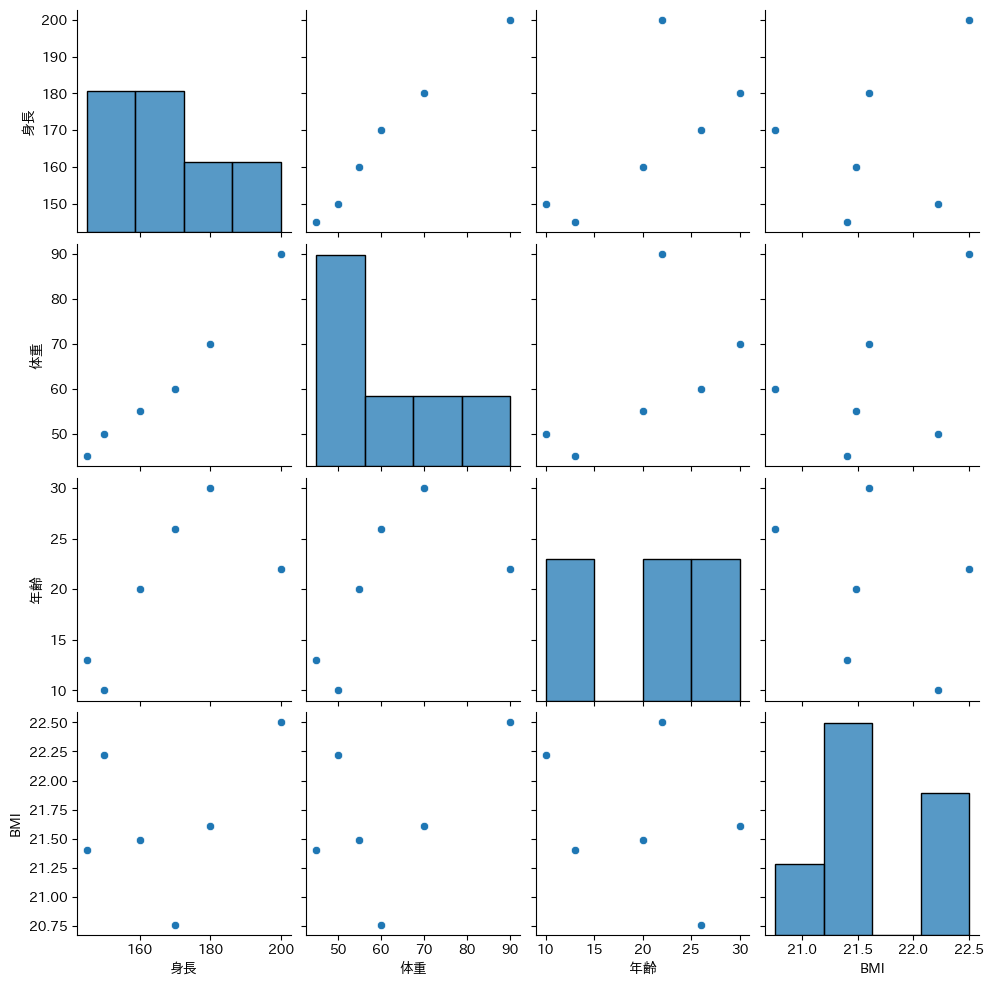

In [52]:
sns.pairplot(
    df3
)

## 集計を行う

In [53]:
df3

,名前,身長,体重,年齢,出身地,現住所,性別,BMI
0,太郎,160,55,20,島根,島根,男,21.484375
1,次郎,170,60,26,島根,大阪,男,20.761246
2,三郎,180,70,30,島根,東京,男,21.604938
3,四郎,150,50,10,島根,島根,男,22.222222
4,花子,145,45,13,島根,東京,女,21.403092
5,五郎,200,90,22,島根,広島,男,22.500000


### ある列の各値の数を確認

In [54]:
df3['現住所'].value_counts()

,count
現住所,
島根,2
東京,2
大阪,1
広島,1


### クロス集計

In [55]:
# pivot table
pd.pivot_table(
    df3,
    index='性別',
    columns='現住所',
    values='BMI',
    aggfunc='mean'
)

現住所,大阪,島根,広島,東京
性別,,,,
女,NaN,NaN,NaN,21.403092
男,20.761246,21.853299,22.5,21.604938


In [56]:
# pivot table
pd.pivot_table(
    df3,
    index='性別',
    columns='現住所',
    values='名前',
    aggfunc='nunique',
    # 合計(All)を表示させるかどうか
    margins=True
)

現住所,大阪,島根,広島,東京,All
性別,,,,,
女,NaN,NaN,NaN,1.0,1
男,1.0,2.0,1.0,1.0,5
All,1.0,2.0,1.0,2.0,6


In [57]:
# crosstabが便利
pd.crosstab(
    index=[df3['性別']],
    columns=[df3['現住所']],
    # 合計(All)を表示させるかどうか
    margins=True
)

現住所,大阪,島根,広島,東京,All
性別,,,,,
女,0,0,0,1,1
男,1,2,1,1,5
All,1,2,1,2,6


In [58]:
# crosstabが便利
# 2要素の指定も可能
pd.crosstab(
    index=[df3['性別']],
    columns=[
        df3['出身地'],
        df3['現住所']
    ],
    # 合計(All)を表示させるかどうか
    margins=True
)

出身地 島根          All
現住所 大阪 島根 広島 東京    
性別                 
女    0  0  0  1   1
男    1  2  1  1   5
All  1  2  1  2   6

## ダミー変数化

In [59]:
df3

,名前,身長,体重,年齢,出身地,現住所,性別,BMI
0,太郎,160,55,20,島根,島根,男,21.484375
1,次郎,170,60,26,島根,大阪,男,20.761246
2,三郎,180,70,30,島根,東京,男,21.604938
3,四郎,150,50,10,島根,島根,男,22.222222
4,花子,145,45,13,島根,東京,女,21.403092
5,五郎,200,90,22,島根,広島,男,22.500000


In [60]:
df4 = pd.get_dummies(df3, columns=['現住所'], dtype=int)
df4

,名前,身長,体重,年齢,出身地,性別,BMI,現住所_大阪,現住所_島根,現住所_広島,現住所_東京
0,太郎,160,55,20,島根,男,21.484375,0,1,0,0
1,次郎,170,60,26,島根,男,20.761246,1,0,0,0
2,三郎,180,70,30,島根,男,21.604938,0,0,0,1
3,四郎,150,50,10,島根,男,22.222222,0,1,0,0
4,花子,145,45,13,島根,女,21.403092,0,0,0,1
5,五郎,200,90,22,島根,男,22.500000,0,0,1,0


# データの出力と読み込み

## DataFrameをExcelとして保存してみる

In [61]:
# colabの場合
df3.to_excel('./output/df3.xlsx', index=False)

## Excelを読み込んでDataFrameを作成する

In [62]:
# colabの場合
df5 = pd.read_excel('./output/df3.xlsx')
df5

,名前,身長,体重,年齢,出身地,現住所,性別,BMI
0,太郎,160,55,20,島根,島根,男,21.484375
1,次郎,170,60,26,島根,大阪,男,20.761246
2,三郎,180,70,30,島根,東京,男,21.604938
3,四郎,150,50,10,島根,島根,男,22.222222
4,花子,145,45,13,島根,東京,女,21.403092
5,五郎,200,90,22,島根,広島,男,22.500000


## notebookをhtml化

In [63]:
!jupyter nbconvert --to html ./src/20240831_Pythonの基礎と簡単な分析_colab.ipynb

[NbConvertApp] Converting notebook ./src/20240831_Pythonの基礎と簡単な分析_colab.ipynb to html
[NbConvertApp] Writing 672960 bytes to src/20240831_Pythonの基礎と簡単な分析_colab.html
